<a href="https://colab.research.google.com/github/barauna-lo/Code_Library/blob/main/%5BSTORM%5D_simple_end_to_end_demo_pydataglobal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

:<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/takechanman1228/mmm_pydata_global_2022/blob/main/simple_end_to_end_demo_pydataglobal.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/takechanman1228/mmm_pydata_global_2022/blob/main/simple_end_to_end_demo_pydataglobal.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

# Simple End to End Demo

<font color='red'> This notebook is based on a tutorial notebook of lightweight_mmm. </font>

https://github.com/google/lightweight_mmm/blob/main/examples/simple_end_to_end_demo.ipynb

<font color='red'> Also, this notebook uses data set from this repository</font>

https://github.com/sibylhe/mmm_stan

For running chains in parallel you can set the number of CPUs at the begining of the program like the following:
`numpyro.set_host_device_count(n)`

In [1]:
%%capture captured
# First would be to install lightweight_mmm
# If you face the error that requests to restart runtime, Click the restart runtime button and re-install it.
!pip install --upgrade git+https://github.com/google/lightweight_mmm.git

In [2]:
# Import jax.numpy and any other library we might need.
import jax.numpy as jnp
import numpyro
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Import the relevant modules of the library
from lightweight_mmm import lightweight_mmm
from lightweight_mmm import optimize_media
from lightweight_mmm import plot
from lightweight_mmm import preprocessing
from lightweight_mmm import utils
import pandas as pd
import matplotlib.pyplot as plt

## Organising the data for modelling

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# from google.colab import drive
# drive.flush_and_unmount()

In [13]:
ls drive/MyDrive/STORM/Data/*.csv

drive/MyDrive/STORM/Data/bq-results-20231016-201549-1697487364517.csv
drive/MyDrive/STORM/Data/bq-results-20231017-201949-1697574003666.csv
drive/MyDrive/STORM/Data/bquxjob_693be6a2_18b20539c1d.csv
drive/MyDrive/STORM/Data/df_channel.csv
drive/MyDrive/STORM/Data/df_channel_smoothing.csv
drive/MyDrive/STORM/Data/df_channel_weak.csv
drive/MyDrive/STORM/Data/df_channel_week.csv
drive/MyDrive/STORM/Data/dt_prophet_holidays2.csv
drive/MyDrive/STORM/Data/dt_prophet_holidays.csv


In [9]:
def report(CODE_NAME,CPU=None):
  # Creating the respective object along with the gmail login and port number
  from smtplib import SMTP

  email_mine  = "fismatcom.py1@gmail.com"
  password_mine  = "kuwfpepwzukdydwd"
  email1 = "luanorion1@gmail.com"
  #email2 = "luanorion1@gmail.com"
  CODE_NAME = str(CODE_NAME)

  smtp_port = SMTP("smtp.gmail.com", 587)# Establishing a connection to the SMTP server with Transport Layer Security (TLS) mode
  smtp_port.ehlo()# Informing the client to establish a secure connection, either to a TLS or SSL
  smtp_port.starttls()# Logging into your account
  smtp_port.login(email_mine , password_mine)

  # Creating the contents of the email
  subject = f"[{CPU}'s Report] {CODE_NAME} has Finish"
  body = f"\nCongratulations \n\n{CODE_NAME}\n\nHas finished"
  final_message = f"Subject: {subject} \n \n {body}"

  # Creating the list of email addresses
  address_list = [email1]#, email2]
  smtp_port.sendmail(email_mine, address_list, final_message)
  print("Email Sent")
  smtp_port.quit()


In [12]:
file_path = "/content/drive/MyDrive/STORM/Data/df_channel_week.csv"
df_stormx = pd.read_csv(file_path)
df_stormx

,Unnamed: 0,DATE,DISPLAYNETWORK_clicks,DISPLAYNETWORK_conversions_media,DISPLAYNETWORK_sessions,DISPLAYNETWORK_spend,DISPLAYNETWORK_impressions,SEARCH_clicks,SEARCH_conversions_media,SEARCH_sessions,...,GMAIL_spend,GMAIL_impressions,TOTAL_clicks,TOTAL_conversions_media,TOTAL_sessions,TOTAL_spend,TOTAL_impressions,TOTAL_conversions_models,TOTAL_spend_models,cpa
0,0,2021-01-04,10351.0,6.0,9329.0,24485.568774,4685808.0,20880.0,1242.0,20844.0,...,39908.710682,404016.0,198129.0,1982.0,114156.0,570987.967988,25239661.0,1706.0,387497.818350,1687.824559
1,1,2021-01-11,5423.0,6.0,5765.0,15189.333777,2631326.0,15776.0,793.0,16189.0,...,28745.641571,236966.0,118484.0,1203.0,74352.0,408111.441714,16776065.0,1045.0,268806.050577,1439.619375
2,2,2021-01-18,12038.0,7.0,9883.0,33127.142739,4566076.0,18427.0,1007.0,18759.0,...,50955.412229,399322.0,254404.0,1669.0,109415.0,524958.676533,26683201.0,1389.0,338001.373051,1802.818505
3,3,2021-01-25,13510.0,7.0,10899.0,33338.016268,4973417.0,20408.0,1131.0,21231.0,...,61057.782709,455042.0,261001.0,1849.0,123994.0,610525.298917,31066082.0,1529.0,388461.184383,1817.846938
4,4,2021-02-01,5407.0,1.0,5064.0,19858.271740,2925962.0,20591.0,1064.0,21459.0,...,61450.402336,546803.0,253655.0,1602.0,115974.0,627128.893091,30556648.0,1329.0,400967.321348,2272.530154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,138,2023-08-28,90889.0,2.0,68852.0,6163.808176,1515469.0,37344.0,736.0,10792.0,...,0.000000,0.0,228654.0,2511.0,184564.0,534777.357053,11833286.0,1081.0,360446.582434,2331.959704
139,139,2023-09-04,179816.0,1.0,122059.0,9593.159136,2588148.0,34665.0,621.0,8954.0,...,0.000000,0.0,300993.0,2466.0,236645.0,440840.407099,12264009.0,796.0,242935.816551,2127.533602
140,140,2023-09-11,221992.0,3.0,144538.0,9219.776756,2033378.0,37503.0,654.0,9120.0,...,0.000000,0.0,347384.0,3084.0,269541.0,508971.153887,12268202.0,827.0,241780.767498,2117.887929
141,141,2023-09-18,263564.0,1.0,158893.0,44504.330017,12382586.0,34276.0,680.0,9783.0,...,0.000000,0.0,584946.0,3603.0,364028.0,834740.595159,30731067.0,1069.0,541946.323483,3936.327293


In [ ]:
# # I am not sure whether this data set is real, dummy, or simulated data, but for me, it looks more realistic than any other data I found on the internet.
# df = pd.read_csv("https://raw.githubusercontent.com/sibylhe/mmm_stan/main/data.csv")

# # 1. media variables
# # media spending (Simplified media channel for demo)
# mdsp_cols=[col for col in df.columns if 'mdsp_' in col and col !='mdsp_viddig' and col != 'mdsp_auddig' and col != 'mdsp_sem']

# # 2. control variables
# # holiday variables
# hldy_cols = [col for col in df.columns if 'hldy_' in col]
# # seasonality variables
# seas_cols = [col for col in df.columns if 'seas_' in col]

# control_vars =  hldy_cols + seas_cols

# # 3. sales variables
# sales_cols =['sales']

# df_main = df[['wk_strt_dt']+sales_cols+mdsp_cols+control_vars]
# df_main = df_main.rename(columns={'mdsp_dm': 'Direct Mail', 'mdsp_inst': 'Insert', 'mdsp_nsp': 'Newspaper', 'mdsp_audtr': 'Radio', 'mdsp_vidtr': 'TV', 'mdsp_so': 'Social Media', 'mdsp_on': 'Online Display'})
# mdsp_cols = ["Direct Mail","Insert", "Newspaper", "Radio", "TV", "Social Media", "Online Display"]



In [13]:
SEED = 105

In [29]:
# data_size = len(df_main)

# n_media_channels = len(mdsp_cols)
# n_extra_features = len(control_vars)
# media_data = df_main[mdsp_cols].to_numpy()
# extra_features = df_main[control_vars].to_numpy()
# target = df_main['sales'].to_numpy()
# costs = df_main[mdsp_cols].sum().to_numpy()

We can then split the dataset into train and test. Lets leave only the last 24 weeks for testing in this case.

In [30]:
# # Split and scale data.
# test_data_period_size = 24
# split_point = data_size - test_data_period_size
# # Media data
# media_data_train = media_data[:split_point, ...]
# media_data_test = media_data[split_point:, ...]
# # Extra features
# extra_features_train = extra_features[:split_point, ...]
# extra_features_test = extra_features[split_point:, ...]
# # Target
# target_train = target[:split_point]

In [31]:
# plt.figure(figsize=(15, 10))
# plt.subplot(3,1,1)
# sns.lineplot(x=df_main['wk_strt_dt'], y=df_main['sales'],label='Sales')
# plt.xticks([])
# plt.subplot(3,1,(2,3))
# for i in range(len(mdsp_cols)):
#     sns.lineplot(x=df_main['wk_strt_dt'], y=df_main[mdsp_cols[i]],label=mdsp_cols[i])
# #sns.lineplot(x=df_main['wk_strt_dt'], y=df_main['Direct Mail'],label='Sales')
# #Show x ticks every 12 months
# plt.xticks(np.arange(0, len(df_main), 12),rotation=90)
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.show()

### Stormx data

In [14]:
# BRAZILIAN HOLIYDAY VARIABLES from the facebook dataset
df_holiday = pd.read_csv("/content/drive/MyDrive/STORM/Data/dt_prophet_holidays2.csv")
df_holiday = df_holiday[df_holiday['country']=='BR']
#Formar df_holiday has one hot encoded holiday variables
dummies = pd.get_dummies(df_holiday['holiday'])
df_holiday = pd.concat([df_holiday, dummies], axis=1).drop(columns=['holiday'])
# Convert 'ds' column to dstime type
df_holiday['ds'] = pd.to_datetime(df_holiday['ds'])
# Generate the full range of dss
full_ds_range = pd.date_range(start=df_holiday['ds'].min(), end=df_holiday['ds'].max())
# Create a new DataFrame with this full range
df_holiday_full_dss = pd.DataFrame({'ds': full_ds_range})
# Merge to fill in the missing dss
df_holiday = pd.merge(df_holiday_full_dss, df_holiday, on='ds', how='left').fillna(0)
#drop contry and year columns
df_holiday = df_holiday.drop(columns=['country','year']).rename(columns={'ds': 'DATE'})
#rename ds to DATE
df_holiday = df_holiday.rename(columns={'ds': 'DATE'})
# Complet holydays dates
for column in df_holiday.columns:
    if df_holiday[column].dtype == 'float64':
        df_holiday[column] = df_holiday[column].astype(int)

#########################################################################3
min_stormx = df_stormx['DATE'].min()
max_stromx = df_stormx['DATE'].max()

# Now  crete a dataframe "df_stromx_holiday" is the inverval of time between 'min_stormx_date' and 'max_stromx_date' coming from 'df_holiday'
df_stormx_holiday = df_holiday[(df_holiday['DATE'] >= min_stormx) & (df_holiday['DATE'] <= max_stromx)]
df_stormx_holiday.to_csv("df_stormx_holiday.csv")

In [15]:
#"DISPLAYNETWORK_spend","GOOGLE_DISCOVERY_spend", "PLACEMENT_OPTIMIZATION_spend","PERFORMANCE_MAX_spend", "GDN_spend", "SEARCH_spend
mdsp_cols_stormx =                  ['DISPLAYNETWORK_spend','GOOGLE_DISCOVERY_spend', 'PLACEMENT_OPTIMIZATION_spend','PERFORMANCE_MAX_spend', 'GDN_spend', 'SEARCH_spend']#,'TOTAL_conversions_media']
df_stormx_model = df_stormx[['DATE','DISPLAYNETWORK_spend','GOOGLE_DISCOVERY_spend', 'PLACEMENT_OPTIMIZATION_spend','PERFORMANCE_MAX_spend', 'GDN_spend', 'SEARCH_spend','TOTAL_conversions_models']]
mdsp_cols = mdsp_cols_stormx

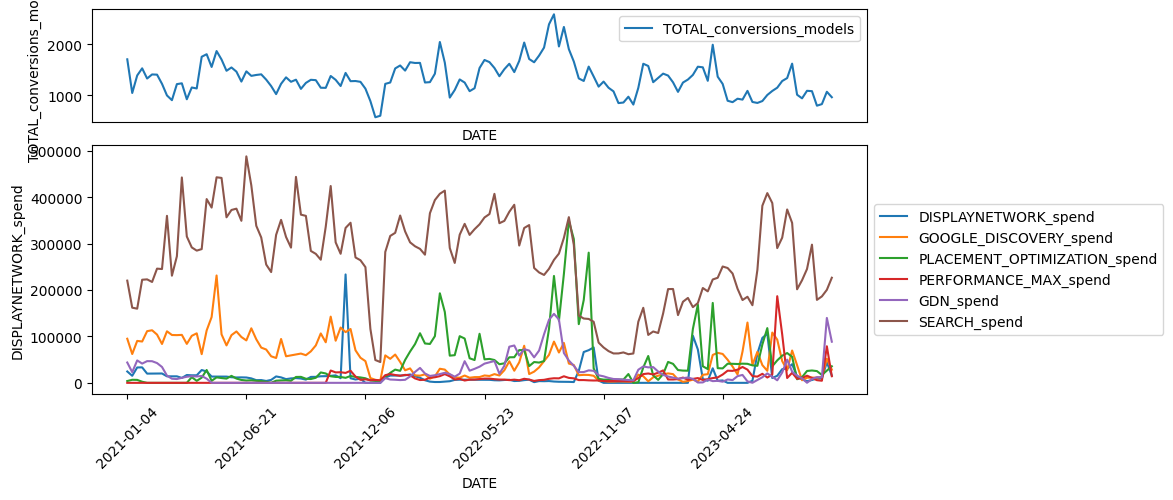

In [17]:
plt.figure(figsize=(10, 5))
plt.subplot(3,1,1)
sns.lineplot(x=df_stormx_model['DATE'], y=df_stormx_model['TOTAL_conversions_models'],label='TOTAL_conversions_models')
plt.xticks([])
plt.subplot(3,1,(2,3))
for i in range(len(mdsp_cols_stormx)):
    sns.lineplot(x=df_stormx_model['DATE'], y=df_stormx_model[mdsp_cols_stormx[i]],label=mdsp_cols_stormx[i])
#Show x ticks every 12 months
plt.xticks(np.arange(0, len(df_stormx_model), 24),rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [18]:
hldy_cols_stormx = df_holiday.drop(columns=['DATE']).columns
control_vars_stormx =  hldy_cols_stormx

In [19]:
data_size = len(df_stormx_model)
n_media_channels = len(mdsp_cols_stormx)
n_extra_features = len(control_vars_stormx)
media_data = df_stormx_model[mdsp_cols_stormx].to_numpy()
extra_features = hldy_cols_stormx.to_numpy()
target = df_stormx_model['TOTAL_conversions_models'].to_numpy()
costs = df_stormx_model[mdsp_cols_stormx].sum().to_numpy()

In [20]:
# Split and scale data.
test_data_period_size = 24
split_point = data_size - test_data_period_size
# Media data
media_data_train = media_data[:split_point, ...]
media_data_test = media_data[split_point:, ...]
# Extra features
extra_features_train = extra_features[:split_point, ...]
extra_features_test = extra_features[split_point:, ...]
# Target
target_train = target[:split_point]

Scaling is essential for many modelling problems and this one is no exception.

We provide the class `CustomScaler` which behaves accordingly with `sklearn`
scalers.

In most cases you will need 3 or 4 scalers. One scaler for the media data, one
for the target and one for costs. Optionally if you are adding extra features
those might need an extra scaler. **It is very important that you save and
"carry with you" those scalers throughout your MMM journey as LighweightMMM will
allow you to re-insert these scalers at different points to ensure everything is
always in the correct scale and results. If some results don't make sense, it
might be a scaling problem.**

A few more details on CustomScaler usage:

This scaler can be used in two fashions for both the multiplication and division
operation.
- By specifying a value to use for the scaling operation.
- By specifying an operation used at column level to calculate the value for the
actual scaling operation.

Eg. if one wants to scale the dataset by multiply by 100 you can directly pass
multiply_by=100. Value can also be an array of an appropriate shape by which
to divide or multiply the data. But if you want to multiply by the mean value of each
column, then you can pass multiply_operation=jnp.mean (or any other operation
desired).

Operation parameters have the upper hand in the cases where both values and
operations are passed, values will be ignored in this case.

Consult the full class documentation if you still need to know more.

In this demo we divide the data on media, extra features and the target by their mean to ensure that the result has a mean of 1. This allows the model to be agnostic to the scale of the inputs (e.g. a user can use either the number of sales or the value of sales). The costs are not used in the model directly, they are only used to inform the prior distributions on the media variables (see the [model documentation](https://lightweight-mmm.readthedocs.io/en/latest/models.html) here). These costs have been scaled down by multiplying by 0.15 to reflect typical ranges in MMMs.

In [21]:
media_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean)
extra_features_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean)
target_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean)
cost_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean, multiply_by=0.15)

media_data_train = media_scaler.fit_transform(media_data_train)
#extra_features_train = extra_features_scaler.fit_transform(extra_features_train)
target_train = target_scaler.fit_transform(target_train)
costs = cost_scaler.fit_transform(costs)

### Training the model

The currently available models are the following:
- hill_adstock
- adstock
- carryover

In [33]:
models_name = ["hill_adstock",
                "adstock",
                "carryover"]

mmm_hill_adstock = lightweight_mmm.LightweightMMM(model_name=models_name[0])
mmm_adstock      = lightweight_mmm.LightweightMMM(model_name=models_name[1])
mmm_carryover    = lightweight_mmm.LightweightMMM(model_name=models_name[2])

models = [mmm_hill_adstock
         ,mmm_adstock,
          mmm_carryover]

Training the model will require the following mandatory parameters:
- media
- total_costs (one value per channel)
- target

We can optionally also pass the following:
- extra_features: Other variables to add to the model.
- degrees_seasonality: Number of degrees to use for seasonality. Default is 3.
- seasonality_frequency: Frequency of the time period used. Default is 52 as in 52 weeks per year.
- media_names: Names of the media channels passed.
- number_warmup: Number of warm up samples. Default is 1000.
- number_samples: Number of samples during sampling. Default is 1000.
- number_chains: Number of chains to sample. Default is 2.

In [25]:
number_warmup=10
number_samples=10

In [34]:
load_models = False
gen_and_save = False
#path = "gs://orion_testes/"
path = "/content/drive/MyDrive/STORM/"
path_models = [path+f"media_mix_model_{models_name[0]}.plk",
               path+f"media_mix_model_{models_name[1]}.plk",
               path+f"media_mix_model_{models_name[2]}.plk"]


In [35]:
# For replicability in terms of random number generation in sampling
# reuse the same seed for different trainings.

# LOADING SAVE MODELS
if load_models == True:
  # Once saved one can load the models.
  loaded_mmm = []
  for i in range(len(models)):
    loaded_mmm.append(utils.load_model(file_path=paths[i]))
    loaded_mmm[i].trace["coef_media"].shape # Example of accessing any of the model values.
  models = loaded_mmm

# GENERATING NEW MODELS
else:
  for i in range(len(models)):
    models[i].fit(
        media=media_data_train,
        media_prior=costs,
        target=target_train,
        #extra_features=extra_features_train,
        number_warmup =number_warmup,
        number_samples=number_samples,
        media_names = mdsp_cols_stormx,
        seed=SEED)
    if gen_and_save == True:
      utils.save_model(media_mix_model=models[i],    file_path=path_models[i])

/usr/local/lib/python3.10/dist-packages/lightweight_mmm/lightweight_mmm.py:358: UserWarning: There are not enough devices to run parallel chains: expected 2 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(2)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  mcmc = numpyro.infer.MCMC(
sample: 100%|██████████| 20/20 [00:05<00:00,  3.83it/s, 6 steps of size 6.84e-04. acc. prob=0.10] 
/usr/local/lib/python3.10/dist-packages/lightweight_mmm/lightweight_mmm.py:358: UserWarning: There are not enough devices to run parallel chains: expected 2 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(2)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  mcmc = numpyro.infer.MCMC(
sam


You can check the summary of your trace by printing a summary:

# RESULTS

In [36]:
mdsp_cols = mdsp_cols_stormx

In [37]:
mdsp_cols = [column.replace('_spend', '') for column in mdsp_cols]

In [38]:
for i in range(len(models)):
  models[i].print_summary()


                                         mean       std    median      5.0%     95.0%     n_eff     r_hat
                      coef_media[0]      0.03      0.01      0.03      0.02      0.05      6.18      1.36
                      coef_media[1]      0.04      0.02      0.03      0.02      0.07      1.09      4.17
                      coef_media[2]      0.11      0.03      0.11      0.05      0.15     12.97      0.90
                      coef_media[3]      0.02      0.00      0.02      0.01      0.03     20.78      0.92
                      coef_media[4]      0.08      0.06      0.04      0.03      0.17      1.23      2.39
                      coef_media[5]      0.42      0.27      0.28      0.18      0.82      1.23      2.47
                      coef_trend[0]      0.00      0.01      0.00     -0.00      0.01      1.34      2.18
                         expo_trend      0.98      0.36      1.05      0.57      1.32      1.07      7.83
             gamma_seasonality[0,0]     -0.20

We can visualise the posterior distributions of the media effects:

In [39]:
plot_media_channel_posteriors = []
for i in range(len(models)):
  plot_media_channel_posteriors.append(plot.plot_media_channel_posteriors(media_mix_model=models[i], channel_names=mdsp_cols))

/usr/local/lib/python3.10/dist-packages/arviz/stats/density_utils.py:957: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "histogram" failed type inference due to: No implementation of function Function(<function histogram at 0x79c3c80d7d90>) found for signature:
 
 >>> histogram(readonly buffer(float32, 1d, C), bins=int64, range=UniTuple(readonly buffer(float32, 0d, C) x 2))
 
There are 2 candidate implementations:
  - Of which 2 did not match due to:
  Overload in function 'np_histogram': File: numba/np/arraymath.py: Line 4071.
    With argument(s): '(readonly buffer(float32, 1d, C), bins=int64, range=UniTuple(readonly buffer(float32, 0d, C) x 2))':
   Rejected as the implementation raised a specific error:
     TypingError: Failed in nopython mode pipeline (step: nopython frontend)
   No implementation of function Function(<function linspace at 0x79c3ca2fff40>) found for signature:
    
    >>> linspace(readonly buffer(float32, 0d,

**[*optional*]**

 LightweightMMM also allows you to visualize the prior and posterior distributions for every model parameter at once. Note that we use a kernel density estimator to smooth these distributions for easier interpretability; you may need to adjust the bandwidth of the smoother depending on the shapes of your distributions.
Also, this plot **can take several minutes to run**, especially if using geo-level models. Lowering the number_of_samples_for_prior or restricting to a subset of selected_features can speed up the runtime.

In [67]:
plot_prior_and_posterior = []
for i in range(len(models)):
  plot_prior_and_posterior.append(plot.plot_prior_and_posterior(media_mix_model=models[i]))

One can also check your model's fit to the training data.

In [69]:
# Here is another example where we can pass the target scaler if you want the plot to be in the "not scaled scale"
plot_model_fit = []
for i in range(len(models)):
  plot_model_fit.append(plot.plot_model_fit(models[i], target_scaler=target_scaler))


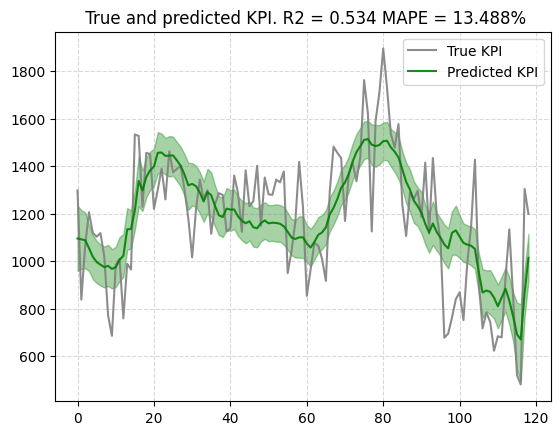

In [70]:
plot_model_fit[0]

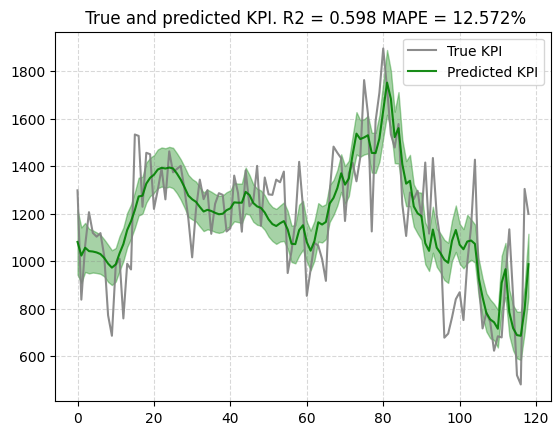

In [71]:
plot_model_fit[1]

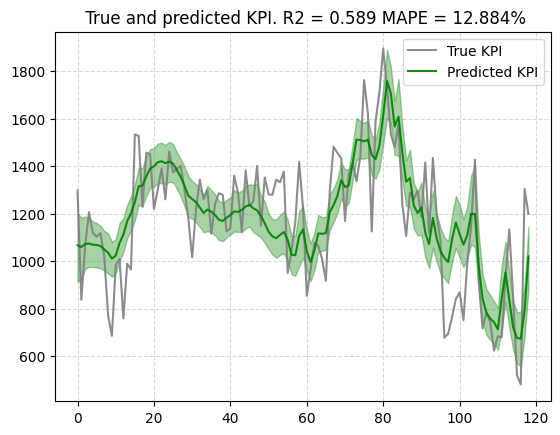

In [72]:
plot_model_fit[2]

If one wants to run predictions on unseen data they can rely on the `predict`
method:

In [73]:
new_prediction = []
for i in range(len(models)):
  new_prediction.append(models[0].predict(media=media_scaler.transform(media_data_test),
                              #extra_features=extra_features_scaler.transform(extra_features_test),
                              seed=SEED))

In [78]:
plot_out_of_sample_model_fit = []
for i in range(len(models)):
  plot_out_of_sample_model_fit.append(plot.plot_out_of_sample_model_fit(out_of_sample_predictions=new_prediction[i],
                                 out_of_sample_target=target_scaler.transform(target[split_point:])))

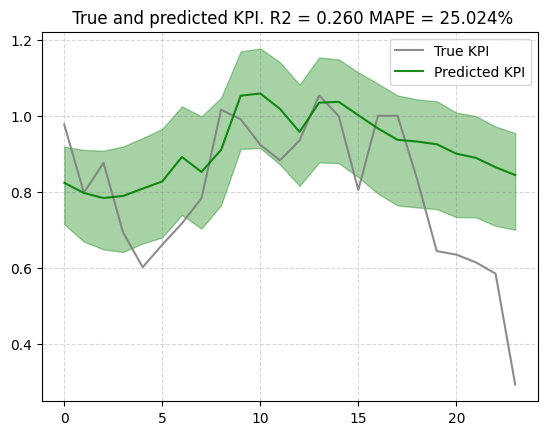

In [79]:
plot_out_of_sample_model_fit[0]

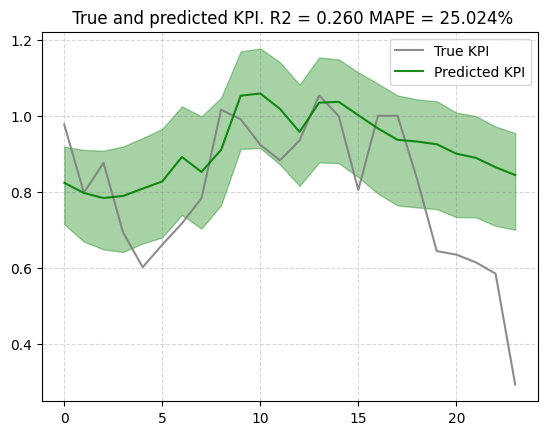

In [80]:
plot_out_of_sample_model_fit[1]

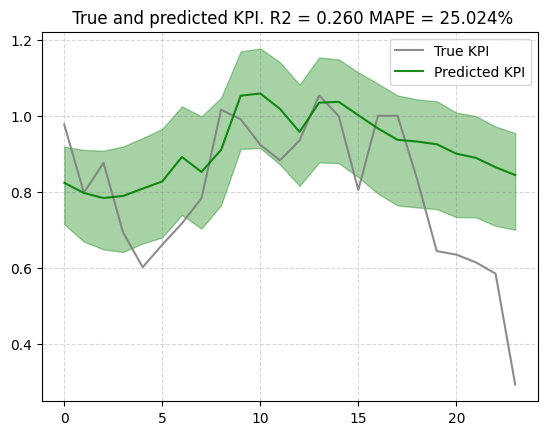

In [81]:
plot_out_of_sample_model_fit[2]

### Media insights

In [86]:
#media_contribution, roi_hat = mmm.get_posterior_metrics(target_scaler=target_scaler, cost_scaler=cost_scaler)
media_contribution0, roi_hat0 = models[0].get_posterior_metrics(target_scaler=target_scaler, cost_scaler=cost_scaler)
media_contribution1, roi_hat1 = models[1].get_posterior_metrics(target_scaler=target_scaler, cost_scaler=cost_scaler)
media_contribution2, roi_hat2 = models[2].get_posterior_metrics(target_scaler=target_scaler, cost_scaler=cost_scaler)

We can quickly visualise the estimated media & baseline contribution over time

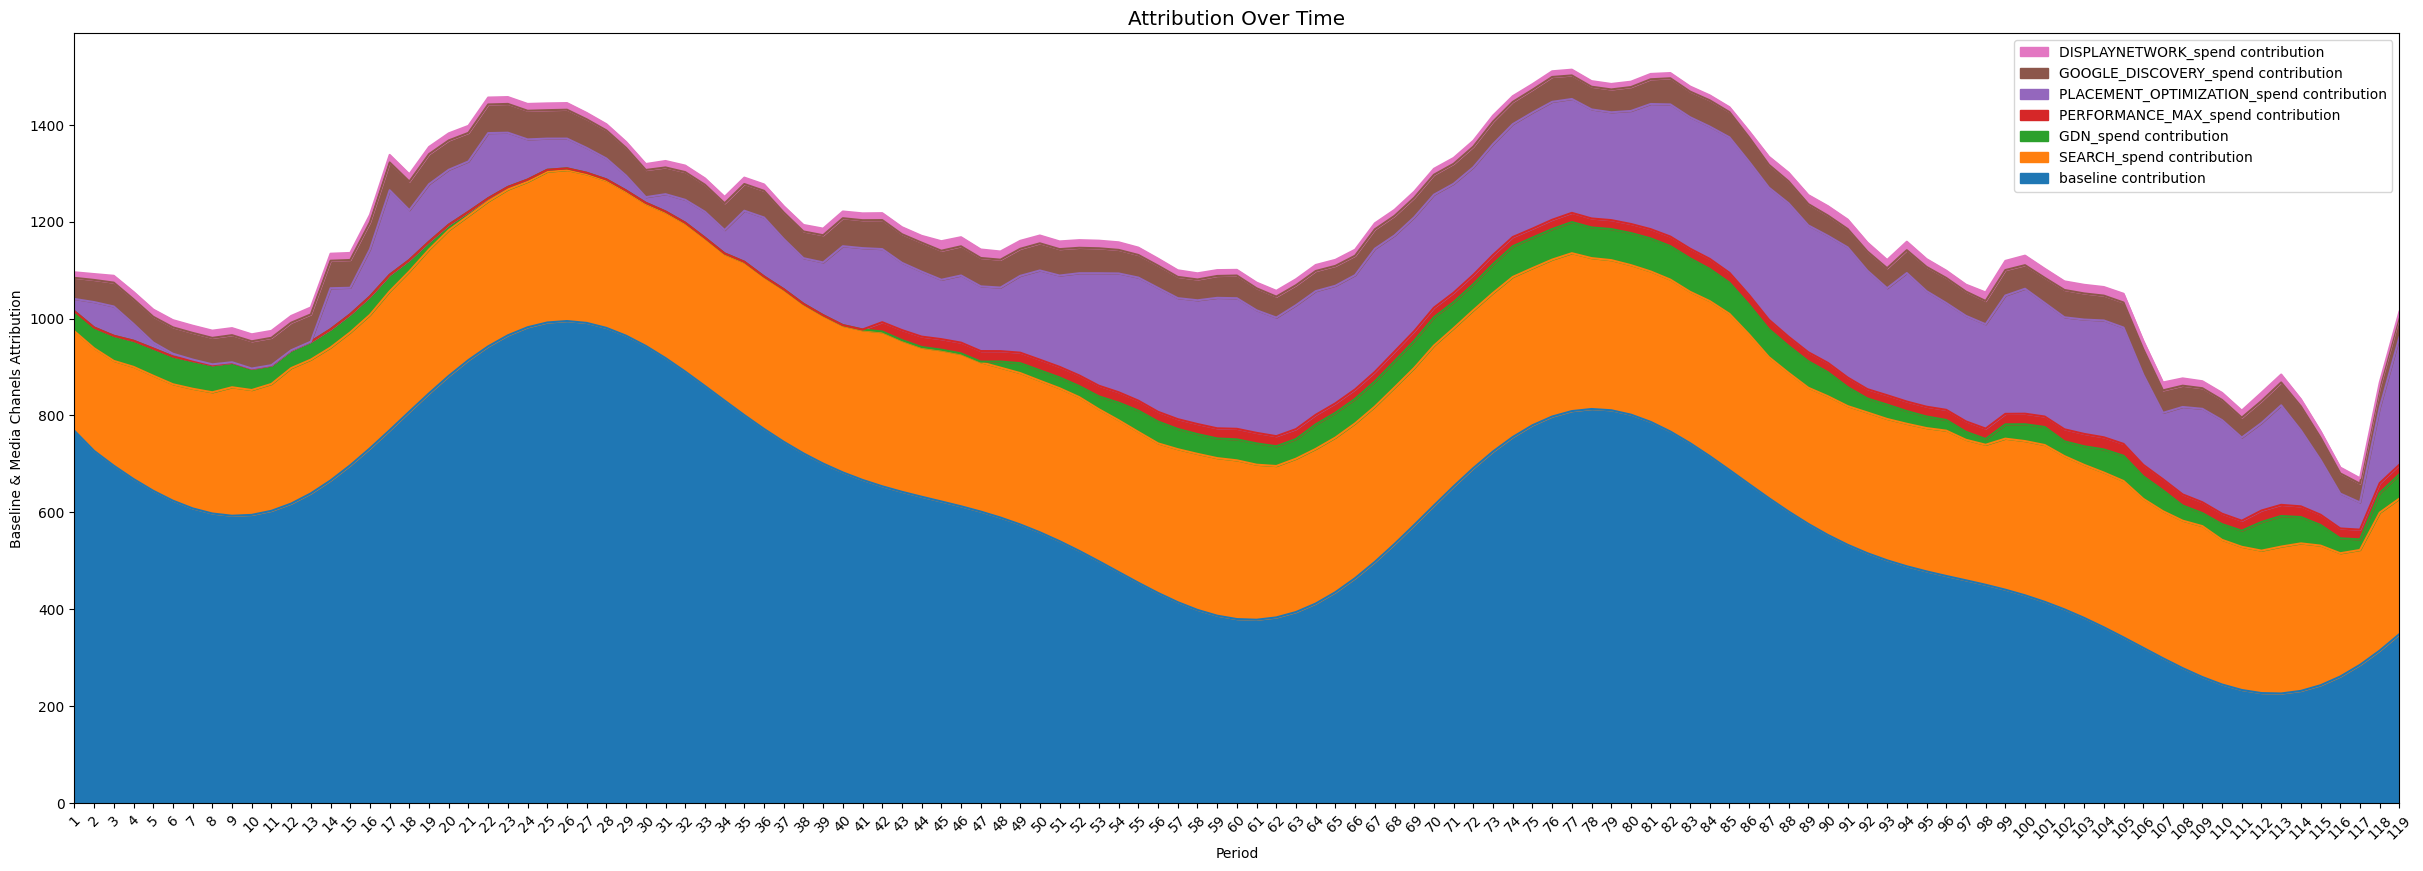

In [82]:
plot.plot_media_baseline_contribution_area_plot(media_mix_model=models[0],
                                                target_scaler=target_scaler,
                                                fig_size=(30,10),
                                                channel_names = mdsp_cols_stormx
                                                )


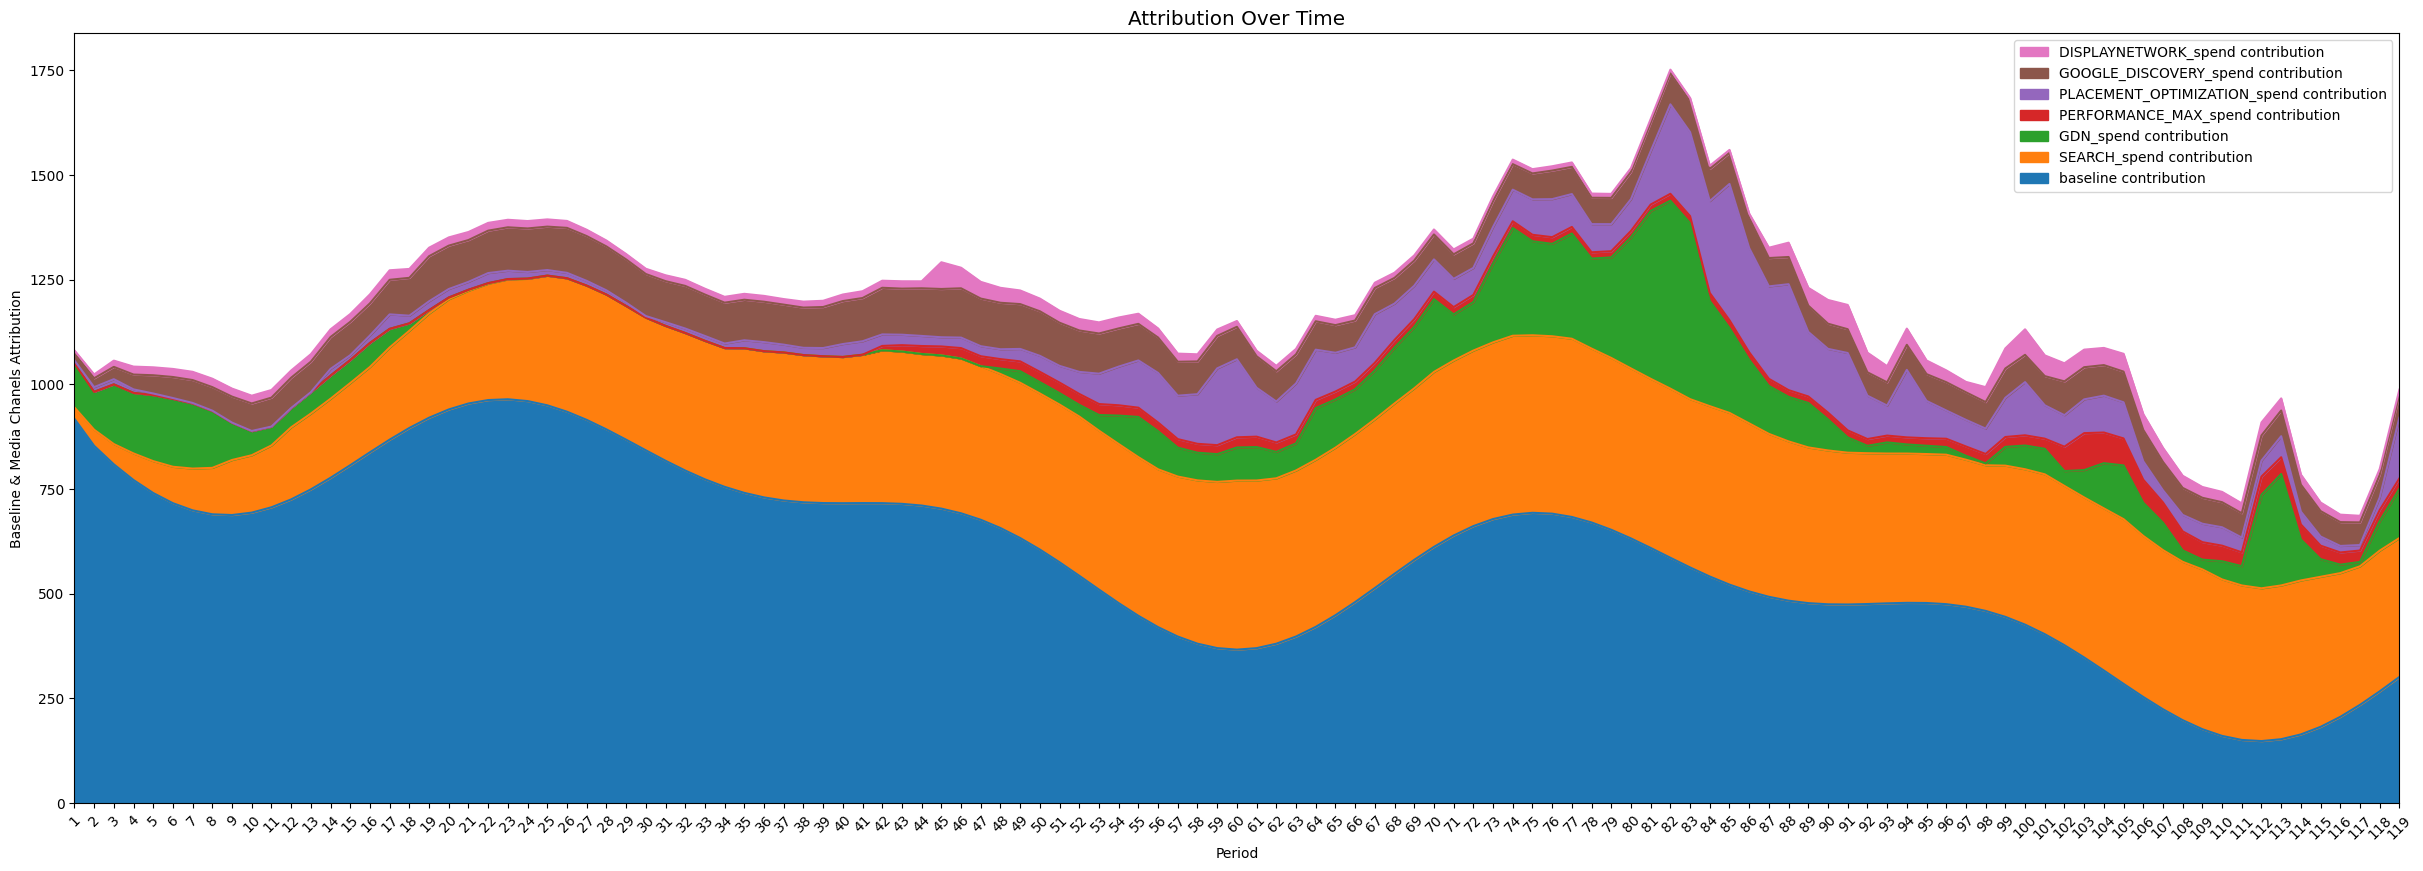

In [83]:
plot.plot_media_baseline_contribution_area_plot(media_mix_model=models[1],
                                                target_scaler=target_scaler,
                                                fig_size=(30,10),
                                                channel_names = mdsp_cols_stormx
                                                )


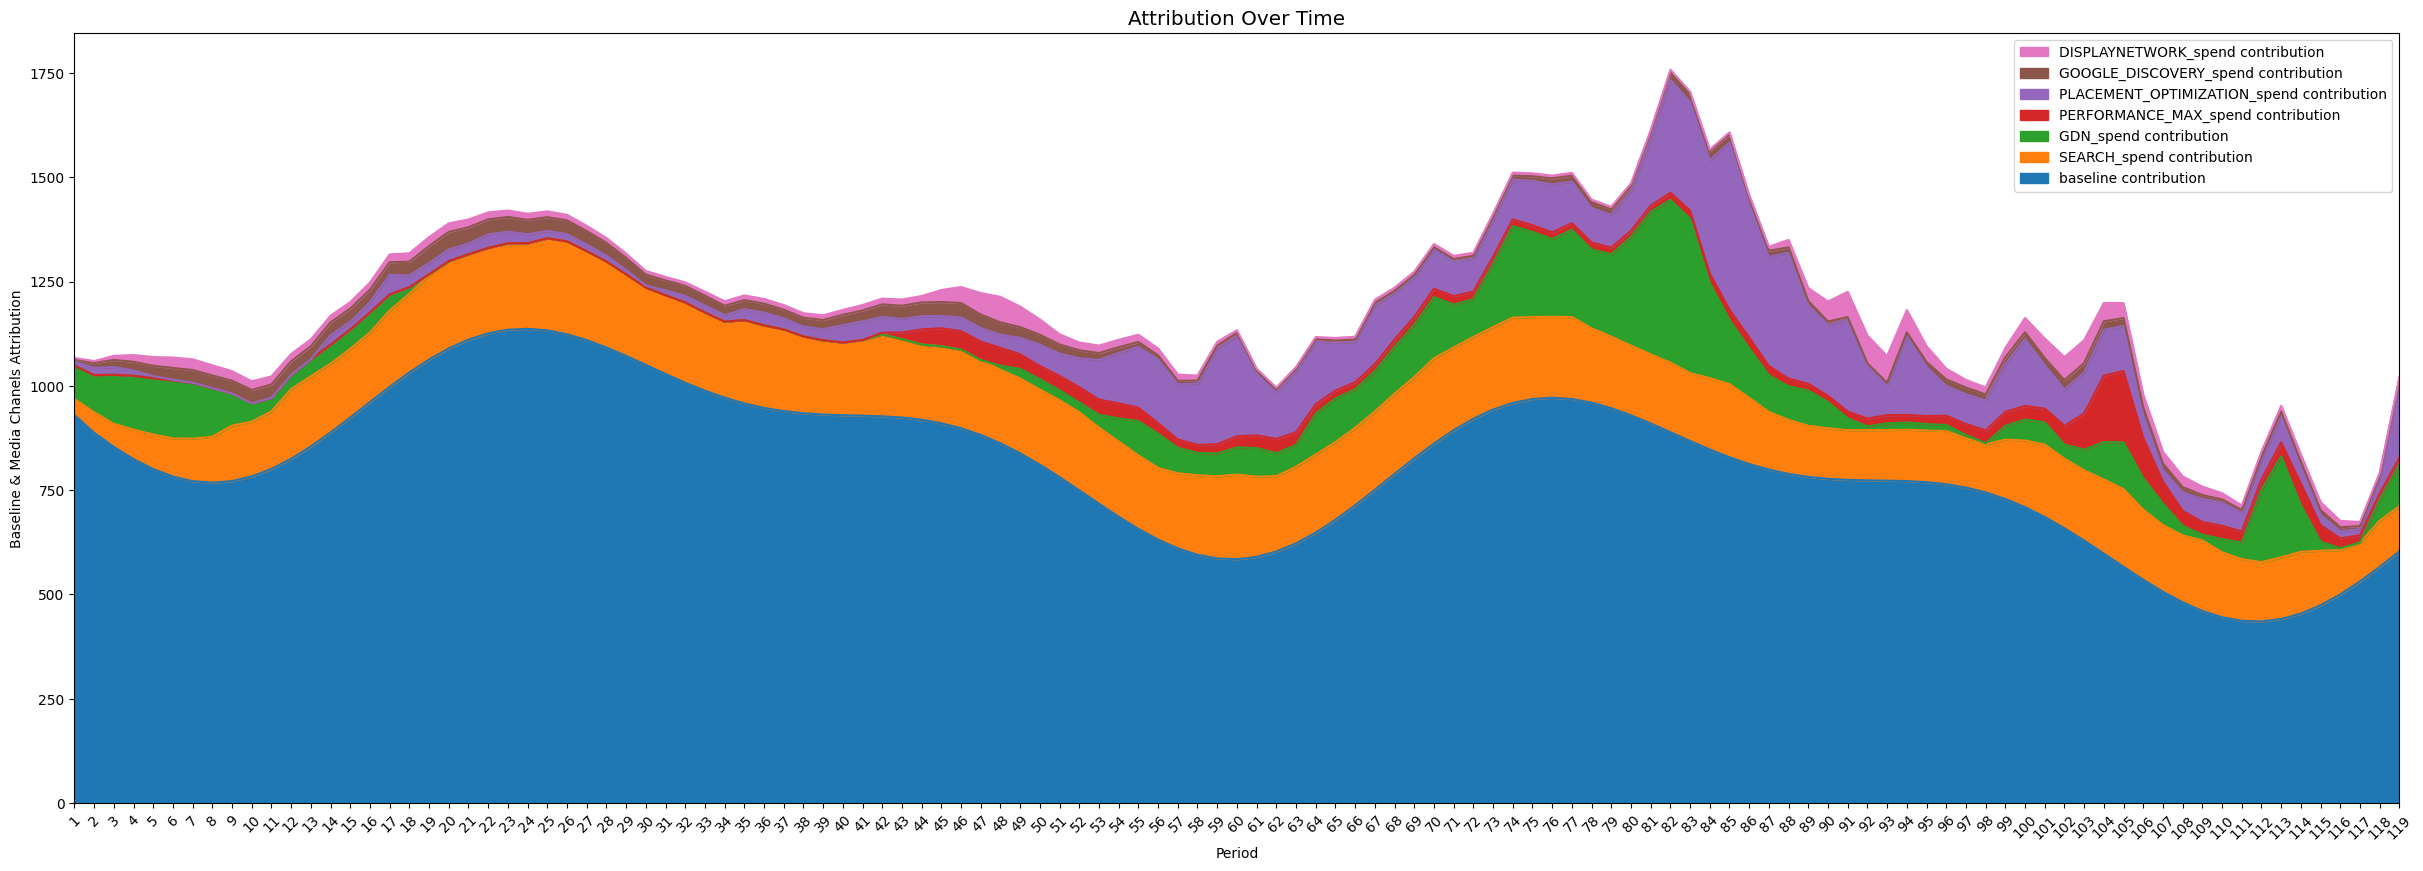

In [84]:
plot.plot_media_baseline_contribution_area_plot(media_mix_model=models[2],
                                                target_scaler=target_scaler,
                                                fig_size=(30,10),
                                                channel_names = mdsp_cols_stormx
                                                )


We can quickly visualise the estimated media contributions with their respective
credibility intervals

In [85]:
plot.plot_bars_media_metrics(metric=media_contribution0, metric_name=" - Media Contribution Percentage", channel_names=mdsp_cols_stormx)

NameError: ignored

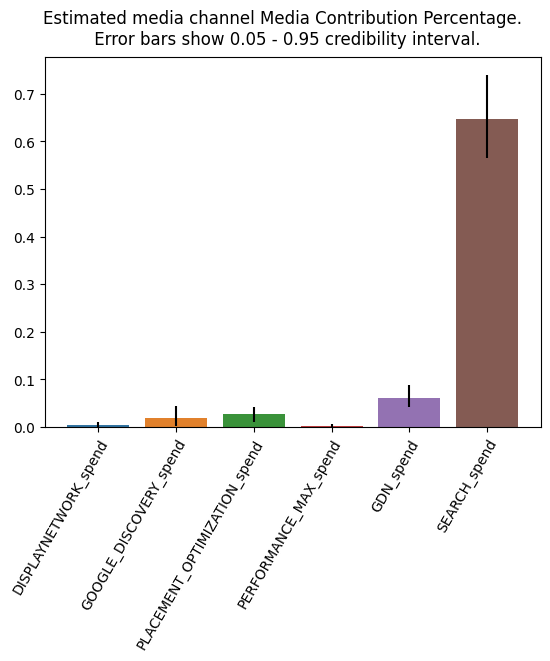

In [ ]:
plot.plot_bars_media_metrics(metric=media_contribution1, metric_name="Media Contribution Percentage", channel_names=mdsp_cols_stormx)

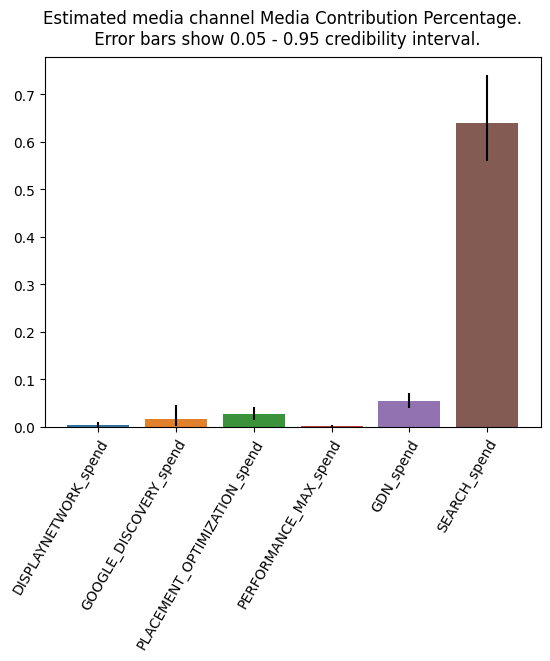

In [ ]:
plot.plot_bars_media_metrics(metric=media_contribution2, metric_name="Media Contribution Percentage", channel_names=mdsp_cols_stormx)

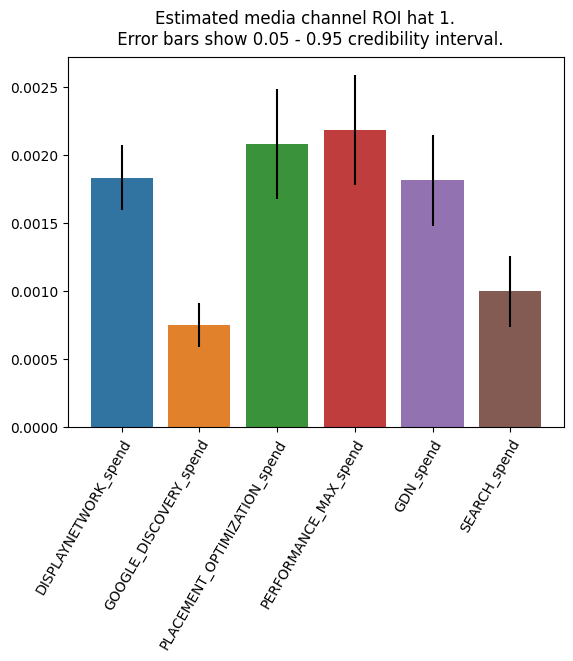

In [ ]:
plot.plot_bars_media_metrics(metric=roi_hat1, metric_name="ROI hat 1", channel_names=mdsp_cols_stormx)

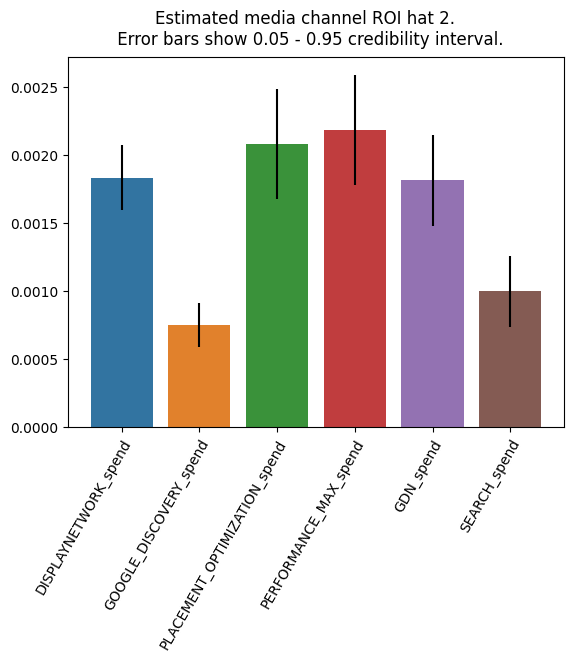

In [ ]:
plot.plot_bars_media_metrics(metric=roi_hat1, metric_name="ROI hat 2", channel_names=mdsp_cols_stormx)

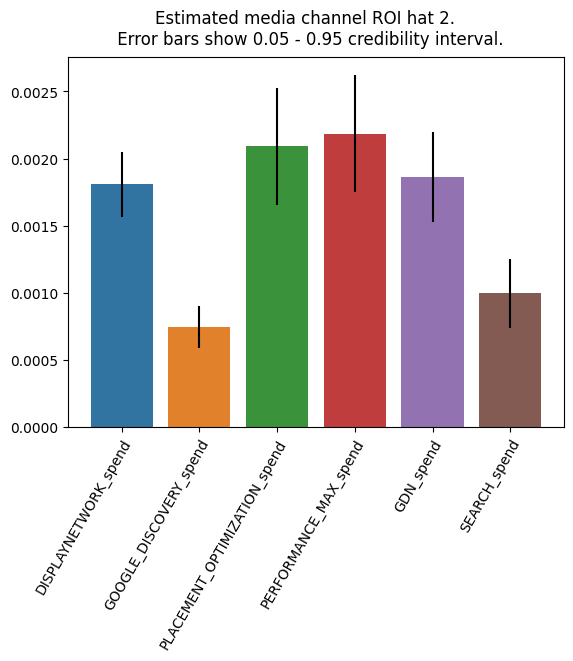

In [ ]:
plot.plot_bars_media_metrics(metric=roi_hat2, metric_name="ROI hat 2", channel_names=mdsp_cols_stormx)

Another vital question we can solve with MMMs is how each media channel behaves
individually as we invest more in it.

For that we can plot the curve response of all media channels with the following
function:

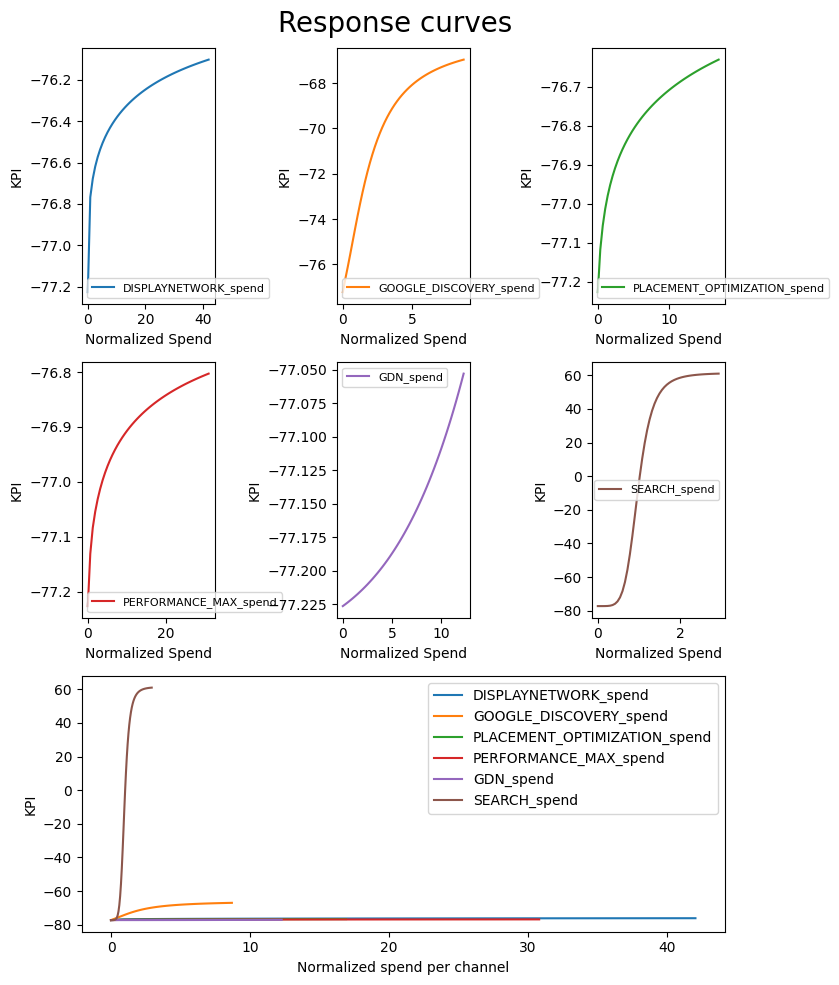

In [ ]:
plot.plot_response_curves(media_mix_model=models[0], target_scaler=target_scaler, seed=SEED)

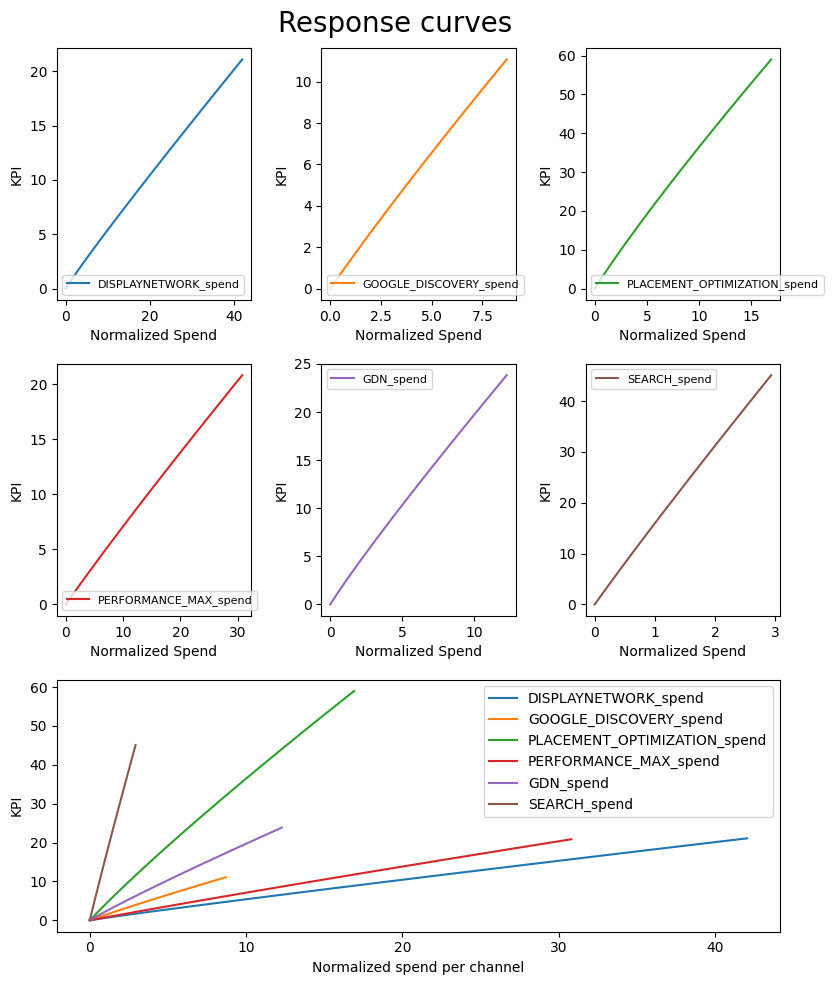

In [ ]:
plot.plot_response_curves(media_mix_model=models[1], target_scaler=target_scaler, seed=SEED)

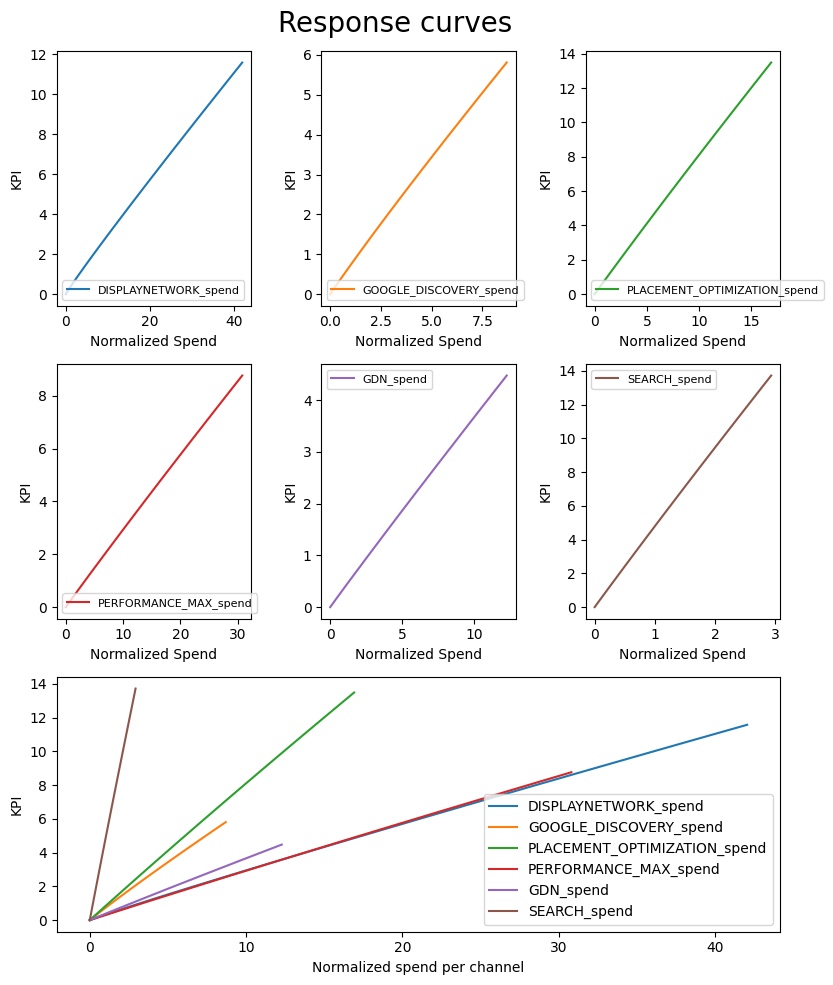

In [ ]:
plot.plot_response_curves(media_mix_model=models[2], target_scaler=target_scaler, seed=SEED)

### Optimization

The optimization is meant to solve the budget allocation questions for you.
First you need to provide for how long you want to optimize your budget (eg. 15
weeks in this case).

The optimization values will be bounded by +- 20% of the max and min historic
values used for training. Which means the optimization won't recommend to
completely change your strategy but how to make some budget re-allocation.

You can change that percentage with the following parameters: -
bounds_lower_pct - bounds_upper_pct

Which can hold 1 value for all channels or 1 value per channel.

Prices are the average price you would expect for the media units of each
channel. If your data is already a money unit (eg. $) your prices should be an
array of 1s.

In [ ]:
#prices = jnp.ones(mmm.n_media_channels)
prices = []
for i in range(len(models)):
  prices.append(jnp.ones(models[i].n_media_channels)  )

The budget is how much one would like to allocate throughtout the total of
`n_time_periods`. Make sure this amount is inline with the historic spend or
otherwise some conditions/bounds in the optimization might not be met.

In [ ]:
n_time_periods = 20
#budget = jnp.sum(jnp.dot(prices, media_data.mean(axis=0)))* n_time_periods
budgets = []
for i in range(len(models)):
  budgets.append(jnp.sum(jnp.dot(prices[i], media_data.mean(axis=0)))*n_time_periods)

In [ ]:
# Run optimization with the parameters of choice.
# solution, kpi_without_optim, previous_media_allocation = optimize_media.find_optimal_budgets(
#     n_time_periods=n_time_periods,
#     media_mix_model=mmm,
#     #extra_features=extra_features_scaler.transform(extra_features_test)[:n_time_periods],
#     budget=budget,
#     prices=prices,
#     media_scaler=media_scaler,
#     target_scaler=target_scaler,
#     seed=SEED)


solution0, kpi_without_optim0, previous_media_allocation0 = optimize_media.find_optimal_budgets(
    n_time_periods=n_time_periods,
    media_mix_model=models[0],
    #extra_features=extra_features_scaler.transform(extra_features_test)[:n_time_periods],
    budget=budgets[0],
    prices=prices[0],
    media_scaler=media_scaler,
    target_scaler=target_scaler,
    seed=SEED)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -3964.9047601681564
            Iterations: 50
            Function evaluations: 650
            Gradient evaluations: 50


In [ ]:
solution1, kpi_without_optim1, previous_media_allocation1 = optimize_media.find_optimal_budgets(
    n_time_periods=n_time_periods,
    media_mix_model=models[1],
    #extra_features=extra_features_scaler.transform(extra_features_test)[:n_time_periods],
    budget=budgets[1],
    prices=prices[1],
    media_scaler=media_scaler,
    target_scaler=target_scaler,
    seed=SEED)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -3740.767517558891
            Iterations: 54
            Function evaluations: 702
            Gradient evaluations: 54


In [ ]:
solution2, kpi_without_optim2, previous_media_allocation2 = optimize_media.find_optimal_budgets(
    n_time_periods=n_time_periods,
    media_mix_model=models[2],
    #extra_features=extra_features_scaler.transform(extra_features_test)[:n_time_periods],
    budget=budgets[2],
    prices=prices[2],
    media_scaler=media_scaler,
    target_scaler=target_scaler,
    seed=SEED)

KeyboardInterrupt: ignored


If your media data is not in money unit (eg. impressions, clicks, GRPs, etc.), you would need to store the cost per values (eg. CPC) in the prices array and multiply it by solution.x to get the recommended budget allocation.



In [ ]:
# #ONE SINGLE MODEL
# # Obtain the optimal weekly allocation.
# optimal_buget_allocation = prices * solution.x
# optimal_buget_allocation

# # similar renormalization to get previous budget allocation
# previous_budget_allocation = prices * previous_media_allocation
# previous_budget_allocation

# # Both these values should be very close in order to compare KPI
# budget, optimal_buget_allocation.sum()

# # Both numbers should be almost equal
# budget, jnp.sum(solution.x * prices)

In [ ]:
#ONE SINGLE MODEL
# Obtain the optimal weekly allocation.
optimal_buget_allocation0 = prices[0] * solution0.x
optimal_buget_allocation0

# similar renormalization to get previous budget allocation
previous_budget_allocation0 = prices[0] * previous_media_allocation0
previous_budget_allocation0

# Both these values should be very close in order to compare KPI
budgets[0], optimal_buget_allocation0.sum()

# Both numbers should be almost equal
budgets[0], jnp.sum(solution0.x * prices[0])

In [ ]:
#ONE SINGLE MODEL
# Obtain the optimal weekly allocation.
optimal_buget_allocation1b = prices[1] * solution1.x
optimal_buget_allocation1

# similar renormalization to get previous budget allocation
previous_budget_allocation1 = prices[1] * previous_media_allocation1
previous_budget_allocation1

# Both these values should be very close in order to compare KPI
budgets[1], optimal_buget_allocation1.sum()

# Both numbers should be almost equal
budgets[1], jnp.sum(solution1.x * prices[1])

In [ ]:
#ONE SINGLE MODEL
# Obtain the optimal weekly allocation.
optimal_buget_allocation2 = prices[2] * solution2.x
optimal_buget_allocation2

# similar renormalization to get previous budget allocation
previous_budget_allocation2 = prices[2] * previous_media_allocation2
previous_budget_allocation2

# Both these values should be very close in order to compare KPI
budgets[2], optimal_buget_allocation2.sum()

# Both numbers should be almost equal
budgets[2], jnp.sum(solution2.x * prices[2])

We can double check the budget constraint was met:

In [ ]:
# Both numbers should be almost equal
budget, jnp.sum(solution.x * prices)

## We can plot the following:
1. Pre post optimization budget allocation comparison for each channel
2. Pre post optimization predicted target variable comparison

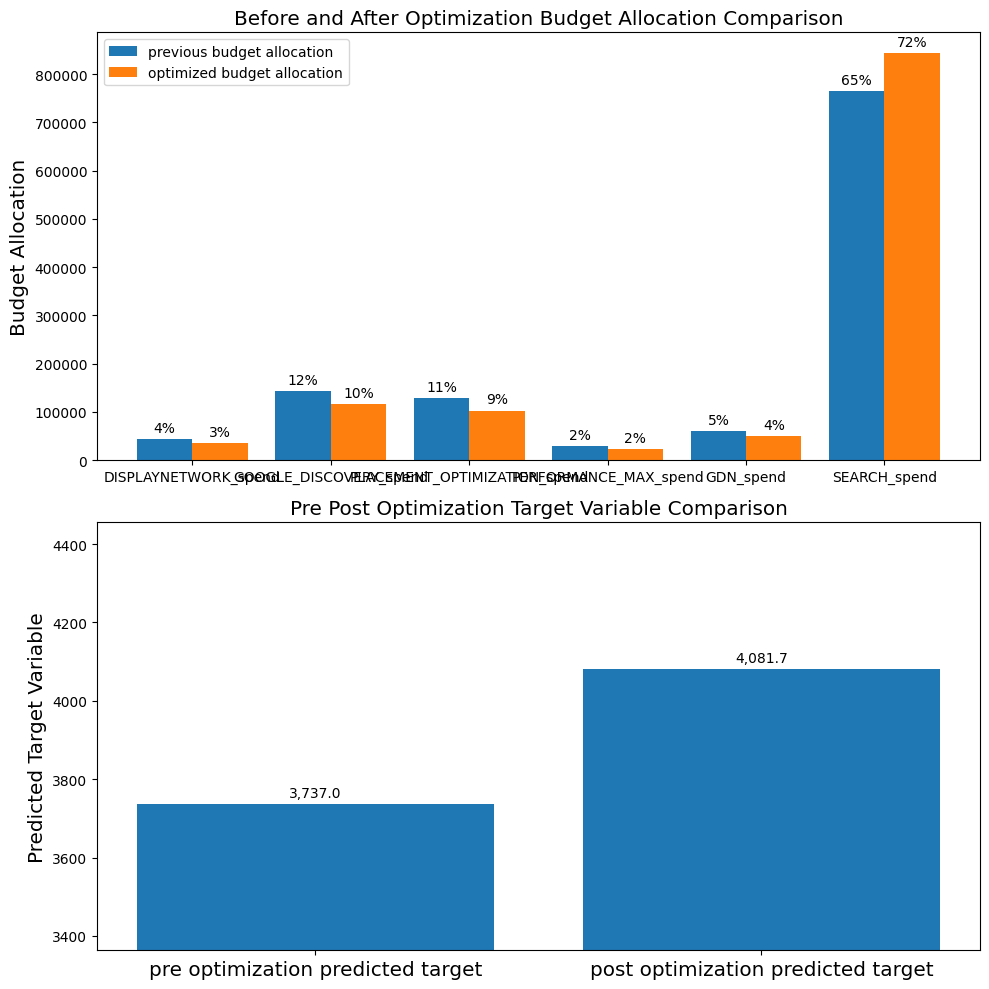

In [ ]:
# # Plot out pre post optimization budget allocation and predicted target variable comparison.
# plot.plot_pre_post_budget_allocation_comparison(media_mix_model=mmm,
#                                                 kpi_with_optim=solution['fun'],
#                                                 kpi_without_optim=kpi_without_optim,
#                                                 optimal_buget_allocation=optimal_buget_allocation,
#                                                 previous_budget_allocation=previous_budget_allocation,
#                                                 figure_size=(10,10),
#                                                 channel_names = mdsp_cols_stormx)


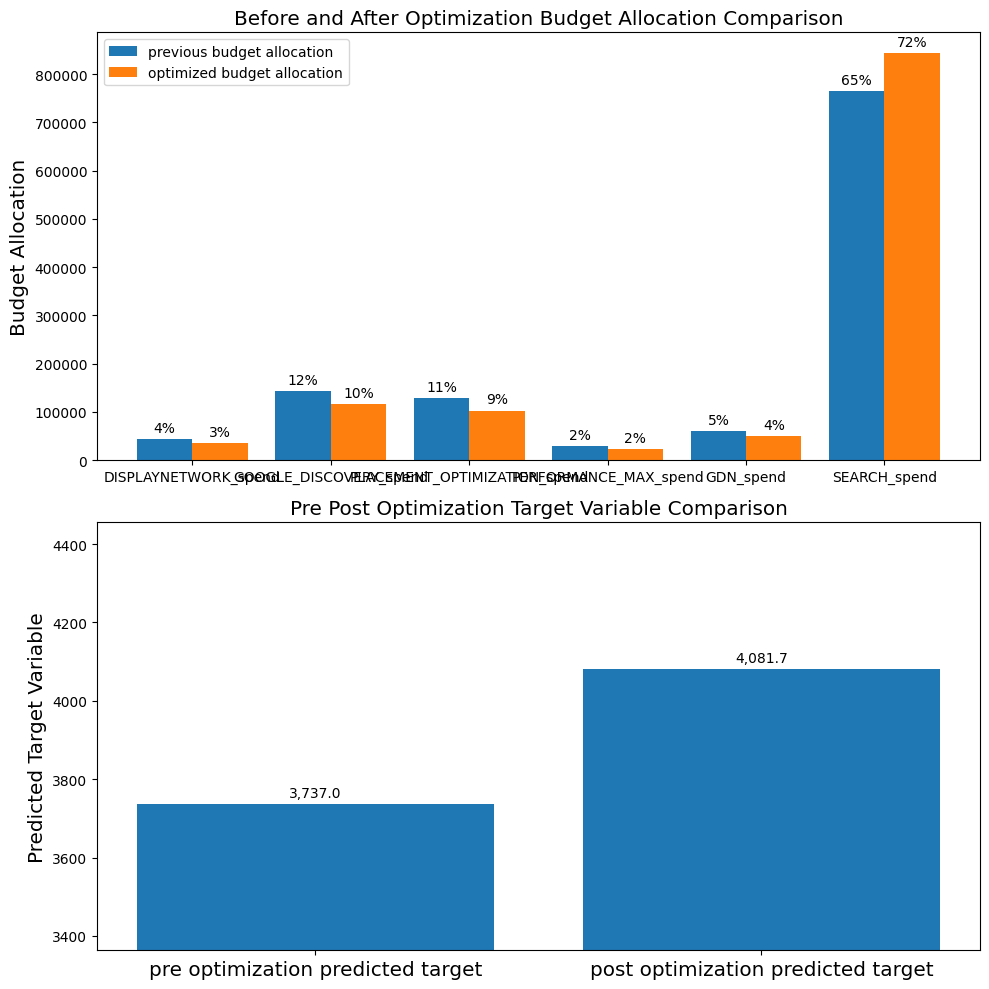

In [ ]:
# Plot out pre post optimization budget allocation and predicted target variable comparison.
plot.plot_pre_post_budget_allocation_comparison(media_mix_model=models[0],
                                                kpi_with_optim=solution['fun'],
                                                kpi_without_optim=kpi_without_optim0,
                                                optimal_buget_allocation=optimal_buget_allocation0,
                                                previous_budget_allocation=previous_budget_allocation0,
                                                figure_size=(10,10),
                                                channel_names = mdsp_cols_stormx)


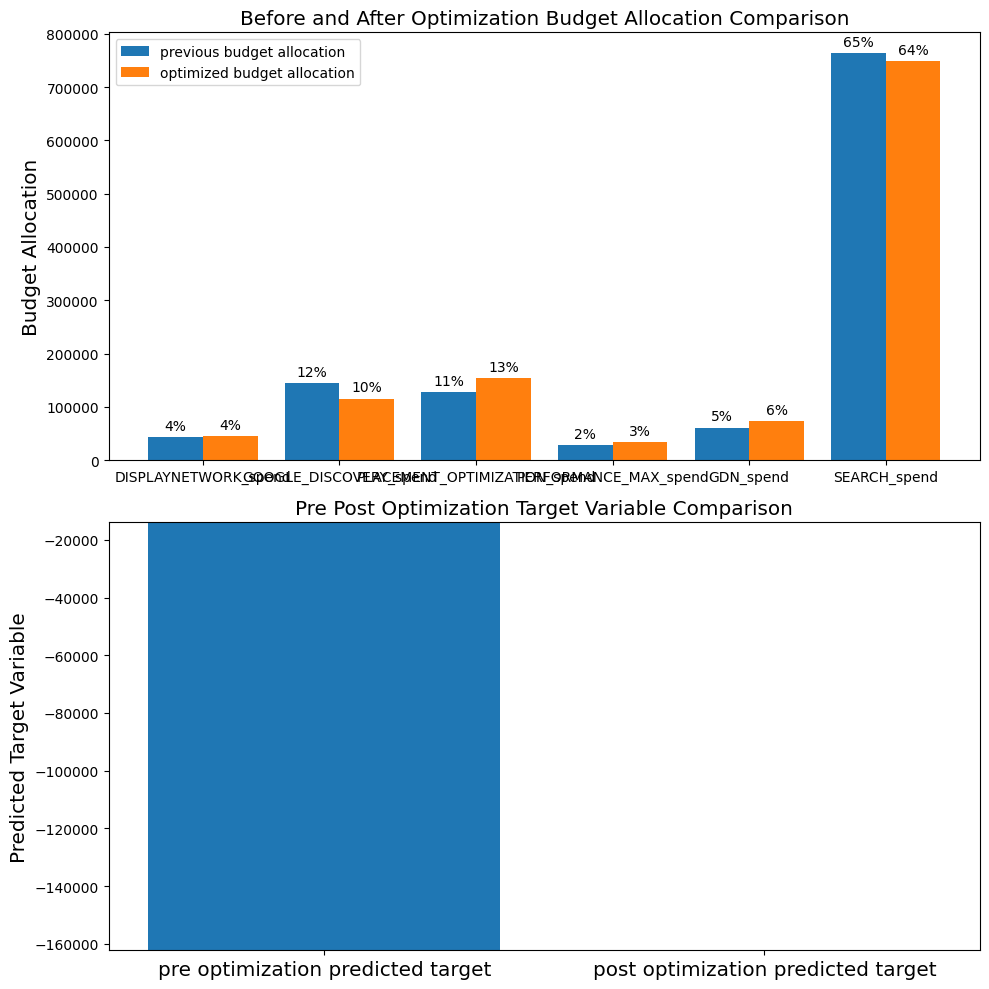

In [ ]:
# Plot out pre post optimization budget allocation and predicted target variable comparison.
plot.plot_pre_post_budget_allocation_comparison(media_mix_model=models[1],
                                                kpi_with_optim=solution['fun'],
                                                kpi_without_optim=kpi_without_optim1,
                                                optimal_buget_allocation=optimal_buget_allocation1,
                                                previous_budget_allocation=previous_budget_allocation1,
                                                figure_size=(10,10),
                                                channel_names = mdsp_cols_stormx)


In [ ]:
# Plot out pre post optimization budget allocation and predicted target variable comparison.
plot.plot_pre_post_budget_allocation_comparison(media_mix_model=models[2],
                                                kpi_with_optim=solution['fun'],
                                                kpi_without_optim=kpi_without_optim2,
                                                optimal_buget_allocation=optimal_buget_allocation2,
                                                previous_budget_allocation=previous_budget_allocation2,
                                                figure_size=(10,10),
                                                channel_names = mdsp_cols_stormx)


## Saving the model to disk

In [ ]:
# We can use the utilities for saving models to disk.
file_path = "media_mix_model.pkl"
utils.save_model(media_mix_model=mmm, file_path=file_path)

In [ ]:
# Once saved one can load the models.
loaded_mmm = utils.load_model(file_path=file_path)
loaded_mmm.trace["coef_media"].shape # Example of accessing any of the model values.

(2000, 6)